## Задание 1

К алгоритму kNN, реализованному в лекции, реализуйте добавление весов соседей по любому из показанных на лекции принципов.
Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

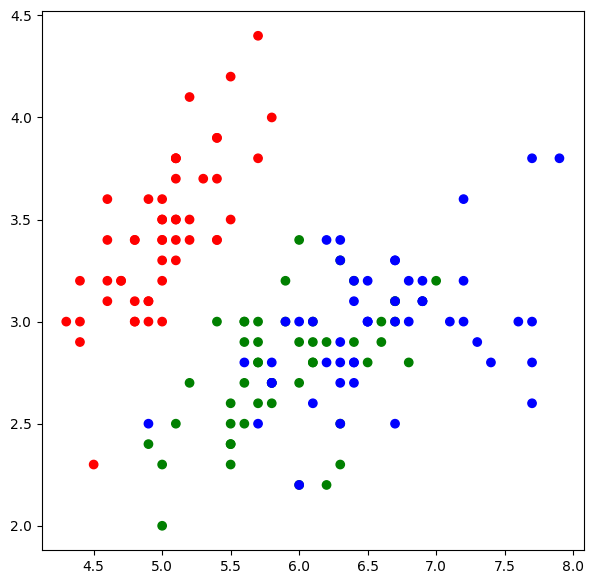

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [5]:
def e_metrics(x1, x2):

    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

Здесь уже добавляются веса.

In [6]:
def knn(x_train, y_train, x_test, k, a = 1):

    answers = []
    for x in x_test:
        test_distances = []

        for i in range(len(x_train)):

            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])

            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))

        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}

        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            distance, label = d

            # непосредственно, вес. А, чтобы не делить на 0, если вдруг что
            weight = 1 / (distance + a)
            classes[label] += weight

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(max(classes, key=classes.get))

    return answers

Напишем функцию для вычисления точности

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [8]:
k_values = [2, 4, 6, 8, 10]

for k in k_values:
    y_pred = knn(X_train, y_train, X_test, k)

    accuracy_value = accuracy(y_pred, y_test)
    print(f'Точность алгоритма при k = {k}: {accuracy_value:.3f}')

Точность алгоритма при k = 2: 0.700
Точность алгоритма при k = 4: 0.700
Точность алгоритма при k = 6: 0.700
Точность алгоритма при k = 8: 0.733
Точность алгоритма при k = 10: 0.733


Построим график распределения классов.

In [9]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(6,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

(2352, 2)


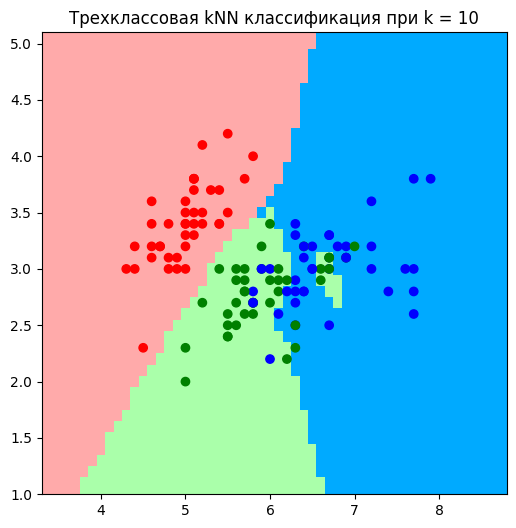

In [10]:
get_graph(X_train, y_train, k)

Среднее квадратичное внутрикластерное расстояние при k = 1: 0.104
Среднее квадратичное внутрикластерное расстояние при k = 2: 0.131
Среднее квадратичное внутрикластерное расстояние при k = 3: 0.152
Среднее квадратичное внутрикластерное расстояние при k = 4: 0.170
Среднее квадратичное внутрикластерное расстояние при k = 5: 0.187
Среднее квадратичное внутрикластерное расстояние при k = 6: 0.203
Среднее квадратичное внутрикластерное расстояние при k = 7: 0.218
Среднее квадратичное внутрикластерное расстояние при k = 8: 0.232
Среднее квадратичное внутрикластерное расстояние при k = 9: 0.245
Среднее квадратичное внутрикластерное расстояние при k = 10: 0.257


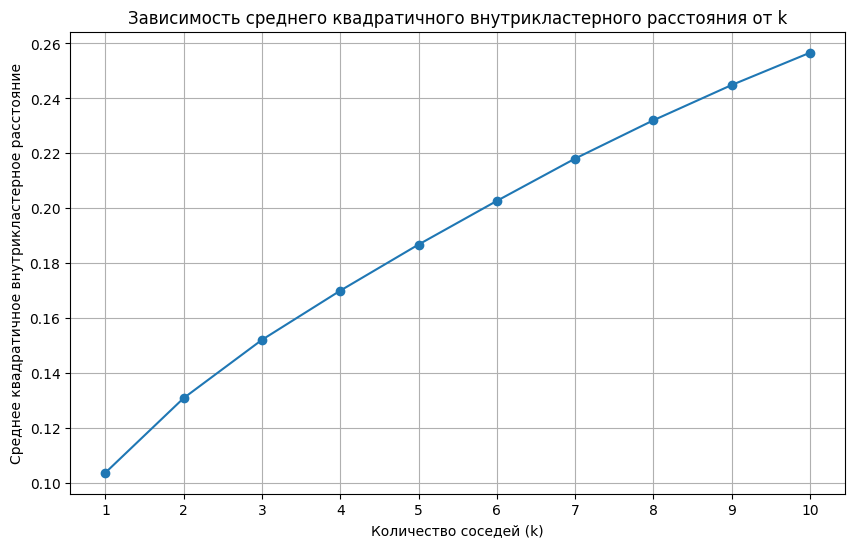

In [11]:
def clustering_quality(X_train, y_train, k):
    distances = []
    for i in range(len(X_train)):
        # Находим ближайшие k соседей
        distances_k = []
        for j in range(len(X_train)):
            if i != j:
                distance = e_metrics(X_train[i], X_train[j])
                distances_k.append(distance)

        # Сортируем и берем k ближайших
        distances_k.sort()
        cluster_distance = np.mean(distances_k[:k])  # Среднее расстояние до k соседей
        distances.append(cluster_distance)

    return np.mean(distances)  # Среднее квадратичное внутрикластерное расстояние

k_values = range(1, 11)
quality_metrics = []

for k in k_values:
    quality_value = clustering_quality(X_train, y_train, k)
    quality_metrics.append(quality_value)
    print(f'Среднее квадратичное внутрикластерное расстояние при k = {k}: {quality_value:.3f}')

plt.figure(figsize=(10, 6))
plt.plot(k_values, quality_metrics, marker='o')
plt.title('Зависимость среднего квадратичного внутрикластерного расстояния от k')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Среднее квадратичное внутрикластерное расстояние')
plt.xticks(k_values)
plt.grid()
plt.show()

## Задание 2

Напишите свою реализацию метода главных компонент посредством сингулярного разложения с использованием функции numpy.linalg.svd().

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def pca(X, n_components):
    # Центрируем данные (вычитаем среднее)
    X_centered = X - np.mean(X, axis=0)

    # Выполняем сингулярное разложение
    U, S, Vt = np.linalg.svd(X_centered)

    # Получаем главные компоненты
    principal_components = Vt.T[:, :n_components]

    # Проектируем данные на главные компоненты
    X_pca = X_centered.dot(principal_components)

    return X_pca, principal_components

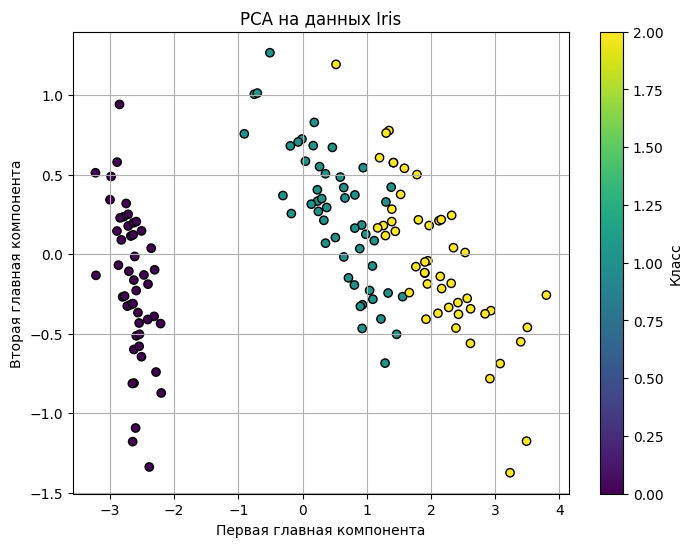

In [13]:
X, y = load_iris(return_X_y=True)

# Применяем PCA, оставляя 2 главные компоненты
X_pca, principal_components = pca(X, n_components=2)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA на данных Iris')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.colorbar(scatter, label='Класс')
plt.grid()
plt.show()